# Support Vector Machine Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

np.random.seed(409781)

label = "rating_label"

train_df = pd.read_csv("train_final_normalised.csv")
train_X = train_df.loc[:, train_df.columns!=label]
train_y = train_df[label]
test_df = pd.read_csv("test_final_normalised.csv")
test_X = test_df.loc[:, test_df.columns!=label]
test_y = test_df[label]
predict_X = pd.read_csv("predict_final_normalised.csv")

### Model Selection

In [2]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample


X_resampled = resample(train_X, n_samples=3000, random_state=1234)
y_resampled = train_y[X_resampled.index]

possible_hyperparams = {'kernel':('rbf', 'linear', 'poly'), 'C': [5], 'degree': [i for i in range(2,15)]}
SVM_classifier = svm.SVC(class_weight='balanced')

grid_search = RandomizedSearchCV(SVM_classifier, possible_hyperparams, n_iter = 15, random_state=5678, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'), n_iter=15,
                   param_distributions={'C': [5],
                                        'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14],
                                        'kernel': ('rbf', 'linear', 'poly')},
                   random_state=5678, scoring='f1_macro')

In [3]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.625997,0.975950,0.072126,0.003001,linear,4,5,"{'kernel': 'linear', 'degree': 4, 'C': 5}",0.373360,0.339581,0.390831,0.386025,0.399131,0.377786,0.020846,9
1,0.506697,0.012895,0.183720,0.030847,rbf,11,5,"{'kernel': 'rbf', 'degree': 11, 'C': 5}",0.454648,0.489070,0.517437,0.501259,0.496912,0.491865,0.020787,1
2,9.764290,1.051131,0.072327,0.002638,linear,7,5,"{'kernel': 'linear', 'degree': 7, 'C': 5}",0.373360,0.339581,0.390831,0.386025,0.399131,0.377786,0.020846,9
3,0.568749,0.014338,0.080591,0.000400,poly,10,5,"{'kernel': 'poly', 'degree': 10, 'C': 5}",0.343270,0.354991,0.390697,0.367474,0.376042,0.366495,0.016429,13
4,0.481429,0.003061,0.162956,0.000395,rbf,6,5,"{'kernel': 'rbf', 'degree': 6, 'C': 5}",0.454648,0.489070,0.517437,0.501259,0.496912,0.491865,0.020787,1
5,0.482633,0.004276,0.164086,0.002333,rbf,9,5,"{'kernel': 'rbf', 'degree': 9, 'C': 5}",0.454648,0.489070,0.517437,0.501259,0.496912,0.491865,0.020787,1
6,0.494669,0.028782,0.164889,0.004451,rbf,14,5,"{'kernel': 'rbf', 'degree': 14, 'C': 5}",0.454648,0.489070,0.517437,0.501259,0.496912,0.491865,0.020787,1
7,0.570241,0.019368,0.084813,0.009482,poly,5,5,"{'kernel': 'poly', 'degree': 5, 'C': 5}",0.367562,0.393781,0.434195,0.409003,0.400846,0.401077,0.021616,8
8,0.553502,0.004623,0.081209,0.001008,poly,8,5,"{'kernel': 'poly', 'degree': 8, 'C': 5}",0.343270,0.362958,0.390697,0.371569,0.374590,0.368617,0.015533,12
9,0.431503,0.001900,0.070889,0.000670,poly,2,5,"{'kernel': 'poly', 'degree': 2, 'C': 5}",0.444258,0.452058,0.522544,0.460427,0.453077,0.466473,0.028500,6


In [27]:
X_resampled = resample(train_X, n_samples=5000, random_state=122)
y_resampled = train_y[X_resampled.index]
possible_hyperparams = {'kernel':['rbf'], 'C':np.linspace(1.0, 25.0, num=10)}
grid_search_two = GridSearchCV(SVM_classifier, possible_hyperparams, scoring=['accuracy','f1_macro'], refit=False)
grid_search_two.fit(X_resampled, y_resampled)
results = pd.DataFrame(grid_search_two.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,1.350014,0.049096,0.476207,0.007435,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.630,0.641,0.621,...,0.010670,10,0.474042,0.521058,0.502979,0.493453,0.497192,0.497745,0.015175,10
1,1.303943,0.029729,0.463293,0.015535,3.666667,rbf,"{'C': 3.6666666666666665, 'kernel': 'rbf'}",0.698,0.708,0.681,...,0.010480,9,0.533274,0.532502,0.514800,0.517825,0.521379,0.523956,0.007588,8
2,1.312292,0.015568,0.436547,0.007002,6.333333,rbf,"{'C': 6.333333333333333, 'kernel': 'rbf'}",0.713,0.717,0.696,...,0.008139,8,0.539167,0.531521,0.517838,0.514271,0.529693,0.526498,0.009170,2
3,1.352699,0.075662,0.426662,0.009461,9.0,rbf,"{'C': 9.0, 'kernel': 'rbf'}",0.720,0.712,0.702,...,0.010361,7,0.540253,0.529756,0.519781,0.522206,0.519605,0.526320,0.007883,3
4,1.297920,0.003856,0.420211,0.003680,11.666667,rbf,"{'C': 11.666666666666666, 'kernel': 'rbf'}",0.715,0.721,0.709,...,0.006974,5,0.532548,0.538386,0.523884,0.519443,0.524552,0.527763,0.006787,1
5,1.307890,0.007669,0.416045,0.001597,14.333333,rbf,"{'C': 14.333333333333332, 'kernel': 'rbf'}",0.711,0.717,0.709,...,0.008818,6,0.530259,0.523423,0.522450,0.521176,0.524169,0.524295,0.003146,7
6,1.321485,0.012449,0.416717,0.002890,17.0,rbf,"{'C': 17.0, 'kernel': 'rbf'}",0.712,0.725,0.706,...,0.008967,3,0.529172,0.530239,0.521229,0.518533,0.526300,0.525094,0.004528,5
7,1.323719,0.009983,0.413763,0.001910,19.666667,rbf,"{'C': 19.666666666666664, 'kernel': 'rbf'}",0.715,0.727,0.704,...,0.009972,2,0.533232,0.531444,0.516333,0.520566,0.524347,0.525185,0.006393,4
8,1.329029,0.007983,0.414648,0.002199,22.333333,rbf,"{'C': 22.333333333333332, 'kernel': 'rbf'}",0.714,0.729,0.700,...,0.011600,4,0.531841,0.534091,0.511755,0.518251,0.522749,0.523738,0.008337,9
9,1.327556,0.008829,0.411354,0.002148,25.0,rbf,"{'C': 25.0, 'kernel': 'rbf'}",0.717,0.730,0.700,...,0.011706,1,0.534382,0.534699,0.511071,0.520299,0.524491,0.524989,0.008927,6


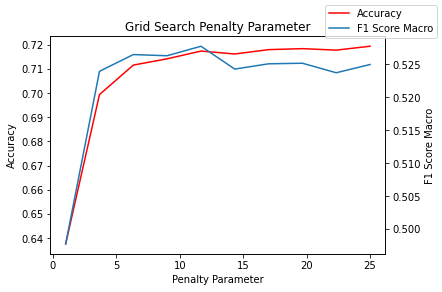

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_title("Grid Search Penalty Parameter")
ax1.plot(results['param_C'], results['mean_test_accuracy'], label = "Accuracy", color = 'red')
ax1.set_xlabel("Penalty Parameter")
ax1.set_ylabel("Accuracy")
ax2 = ax1.twinx()
ax2.plot(results['param_C'], results['mean_test_f1_macro'], label = "F1 Score Macro")
ax2.set_ylabel("F1 Score Macro")
fig.legend()

### SVM Validation

In [29]:
from sklearn import metrics

def report(a, b):
    reports = [
                metrics.accuracy_score(a, b), 
                metrics.precision_score(a, b, average="macro"),
                metrics.recall_score(a, b, average="macro"),
                metrics.f1_score(a, b, average="macro")
               ]
    return reports

In [30]:
# results[results['rank_test_score'] == 1]

In [31]:
SVM_classifier = svm.SVC(kernel='rbf', class_weight='balanced', C=6.333)

In [42]:
SVM_classifier.fit(train_X, train_y)
res = pd.Series(SVM_classifier.predict(test_X))

In [43]:
evaluation_metrics = report(res, test_y)
evaluation_metrics

[0.6431823108606113,
 0.4231536999152266,
 0.49973312692707145,
 0.43893333114693706]

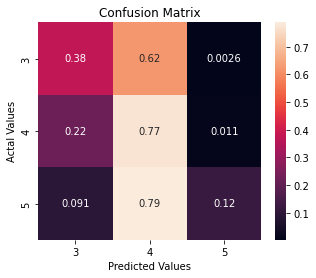

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_y, res)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['3','4','5'], 
                     columns = ['3','4','5'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
pd.Series(res).value_counts()

4.0    3385
3.0    1165
5.0      63
dtype: int64

### SVM Prediction

In [36]:
res = pd.Series(SVM_classifier.predict(predict_X))
res

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
5761    4.0
5762    3.0
5763    4.0
5764    4.0
5765    4.0
Length: 5766, dtype: float64

In [37]:
csv_file = pd.DataFrame(res, columns=[label])
csv_file.insert(0, "id", res.index + 1)
csv_file

,id,rating_label
0,1,4.0
1,2,4.0
2,3,4.0
3,4,4.0
4,5,4.0
...,...,...
5761,5762,4.0
5762,5763,3.0
5763,5764,4.0
5764,5765,4.0


In [38]:
csv_file.to_csv("svm_output.csv", index=False)